In [17]:
# add the dataset kaggle.json file

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download karakaggle/kaggle-cat-vs-dog-dataset

Dataset URL: https://www.kaggle.com/datasets/karakaggle/kaggle-cat-vs-dog-dataset
License(s): unknown
 94% 742M/787M [00:03<00:00, 115MB/s] 
100% 787M/787M [00:03<00:00, 209MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/kaggle-cat-vs-dog-dataset.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [62]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout,GlobalAveragePooling2D

In [63]:
import os

base_dir = "/content/kagglecatsanddogs_3367a/PetImages"   # your dataset path
cat_dir = os.path.join(base_dir, "Cat")
dog_dir = os.path.join(base_dir, "Dog")

print("Number of cat images:", len(os.listdir(cat_dir)))
print("Number of dog images:", len(os.listdir(dog_dir)))


Number of cat images: 12491
Number of dog images: 12470


In [64]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale pixel values from [0,255] → [0,1]
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Training generator
train_data = datagen.flow_from_directory(
    base_dir,
    target_size=(128, 128),   # resize all images
    batch_size=32,
    class_mode="binary",      # since cats vs dogs is binary classification
    subset="training"
)

# Validation generator
val_data = datagen.flow_from_directory(
    base_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode="binary",
    subset="validation"
)


Found 19968 images belonging to 2 classes.
Found 4991 images belonging to 2 classes.


In [69]:
# model

model = Sequential()

model.add(Conv2D(32,(3,3),padding='same',activation='relu',input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(256,(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

# model.add(Flatten())

# Replace Flatten with Global Average Pooling
model.add(GlobalAveragePooling2D())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

In [70]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 32, 32, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 431,553 (1.65 MB)

 Trainable params: 430,593 (1.64 MB)

 Non-trainable params: 960 (3.75 KB)

In [71]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
# old causing overfitting so we added batch normalization and dropouts
history = model.fit(train_data,epochs=10,validation_data=val_data)

Epoch 1/10
470/624 ━━━━━━━━━━━━━━━━━━━━ 13s 91ms/step - accuracy: 0.5625 - loss: 0.7323

/usr/local/lib/python3.12/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


624/624 ━━━━━━━━━━━━━━━━━━━━ 74s 114ms/step - accuracy: 0.5771 - loss: 0.7120 - val_accuracy: 0.7373 - val_loss: 0.5214
Epoch 2/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 59s 94ms/step - accuracy: 0.7526 - loss: 0.5093 - val_accuracy: 0.7658 - val_loss: 0.4848
Epoch 3/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 57s 91ms/step - accuracy: 0.8046 - loss: 0.4203 - val_accuracy: 0.7872 - val_loss: 0.4694
Epoch 4/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 58s 93ms/step - accuracy: 0.8748 - loss: 0.2856 - val_accuracy: 0.7902 - val_loss: 0.4594
Epoch 5/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 64s 103ms/step - accuracy: 0.9446 - loss: 0.1490 - val_accuracy: 0.7922 - val_loss: 0.6904
Epoch 6/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 61s 97ms/step - accuracy: 0.9712 - loss: 0.0788 - val_accuracy: 0.7860 - val_loss: 0.8491
Epoch 7/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 71s 114ms/step - accuracy: 0.9853 - loss: 0.0408 - val_accuracy: 0.7814 - val_loss: 0.9518
Epoch 8/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 63s 100ms/step - accuracy: 0.9935 - loss: 0.0205 - val_acc

In [18]:
history = history.history


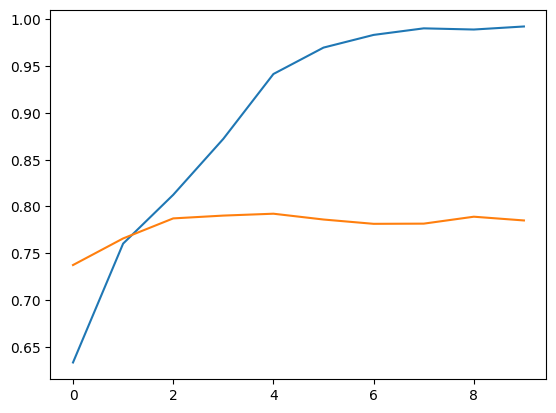

In [19]:
import matplotlib.pyplot as plt

plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])

In [72]:
# model taking time so running only on 5 epoches
history = model.fit(train_data,epochs=20,validation_data=val_data)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
301/624 ━━━━━━━━━━━━━━━━━━━━ 55s 173ms/step - accuracy: 0.5661 - loss: 0.7154

/usr/local/lib/python3.12/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


624/624 ━━━━━━━━━━━━━━━━━━━━ 141s 213ms/step - accuracy: 0.5857 - loss: 0.6925 - val_accuracy: 0.5023 - val_loss: 1.0392
Epoch 2/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 132s 212ms/step - accuracy: 0.6612 - loss: 0.6162 - val_accuracy: 0.6766 - val_loss: 0.6170
Epoch 3/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 129s 206ms/step - accuracy: 0.6991 - loss: 0.5807 - val_accuracy: 0.6201 - val_loss: 0.6760
Epoch 4/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 141s 206ms/step - accuracy: 0.7408 - loss: 0.5235 - val_accuracy: 0.7816 - val_loss: 0.4672
Epoch 5/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 146s 234ms/step - accuracy: 0.8052 - loss: 0.4283 - val_accuracy: 0.7401 - val_loss: 0.5098
Epoch 6/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 129s 207ms/step - accuracy: 0.8472 - loss: 0.3473 - val_accuracy: 0.8393 - val_loss: 0.3769
Epoch 7/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 145s 233ms/step - accuracy: 0.8689 - loss: 0.3027 - val_accuracy: 0.8626 - val_loss: 0.3116
Epoch 8/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 129s 207ms/step - accuracy: 0.8803 - loss: 0.27

In [74]:
history = history.history


AttributeError: 'dict' object has no attribute 'history'

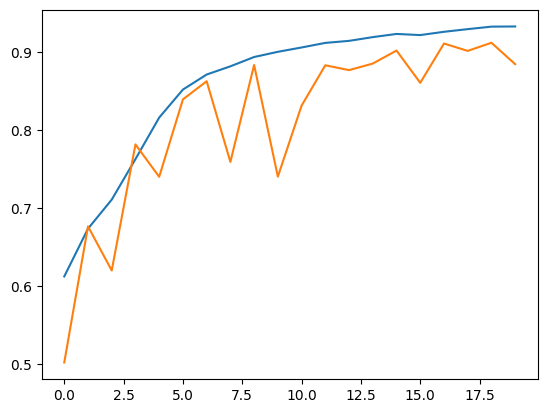

In [75]:
import matplotlib.pyplot as plt

plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])

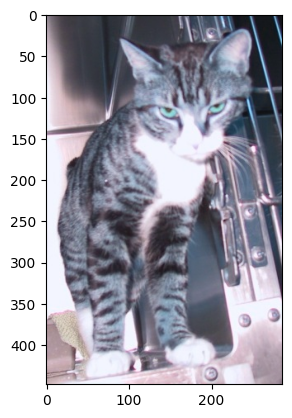

In [130]:
import cv2

# test_image1 = cv2.imread("/content/dog.jpeg")
test_image2 = cv2.imread("/content/kagglecatsanddogs_3367a/PetImages/Cat/10110.jpg")

# plt.imshow(test_image1)
# plt.show()
plt.imshow(test_image2)
plt.show()

In [78]:
test_image1.shape

(192, 204, 3)

In [131]:
# test_image1 = cv2.resize(test_image1,(128,128))
test_image2 = cv2.resize(test_image2,(128,128))

In [132]:
# test_input1 = test_image1.reshape((1,128,128,3))
test_input2 = test_image2.reshape((1,128,128,3))

In [86]:
# model.predict(test_input1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([[1.]], dtype=float32)

In [133]:
pred = model.predict(test_input2)
if pred[0][0] >0.5:
  print("dog")
else:
  print("Cat")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
dog


In [88]:
print("Class indices:", train_data.class_indices)
print("Training samples:", train_data.samples)
print("Validation samples:", val_data.samples)

Class indices: {'Cat': 0, 'Dog': 1}
Training samples: 19968
Validation samples: 4991
